<a href="https://colab.research.google.com/github/AshishBhatnagar022/Flowers-Prediction/blob/master/Flower_type_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile
zer=zipfile.ZipFile('drive/My Drive/Flowers/flowers-recognition.zip','r')
zer.extractall()
zer.close()

In [0]:
import os
from tqdm import tqdm
import cv2
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,RMSprop

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing import image

In [0]:
flow=[]
lab=[]
img_size=150
flo_daisy='flowers/daisy'
flo_dand='flowers/dandelion'
flo_rose='flowers/rose'
flo_sun='flowers/sunflower'
flo_tulip='flowers/tulip'

In [0]:
def assign_label(img,flo_type):
  return flo_type

In [0]:
def train(flo_type,dir):
  for img in tqdm(os.listdir(dir)):
    label=assign_label(img,flo_type)
    path=os.path.join(dir,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(img_size,img_size))
    
    flow.append(np.array(img))
    lab.append(str(label))
    

In [0]:
len(flow)

0

In [0]:
train('Daisy',flo_daisy)

100%|██████████| 769/769 [00:01<00:00, 447.57it/s]


In [0]:
train('Dandelion',flo_dand)

  4%|▎         | 37/1055 [00:00<00:02, 367.92it/s]


error: ignored

In [0]:
train('Rose',flo_rose)

100%|██████████| 784/784 [00:01<00:00, 451.90it/s]


In [0]:
train('Sunflower',flo_sun)

100%|██████████| 734/734 [00:02<00:00, 354.81it/s]


In [0]:
train('Tulip',flo_tulip)

100%|██████████| 984/984 [00:02<00:00, 412.42it/s]


Text(0.5, 1.0, 'Daisy')

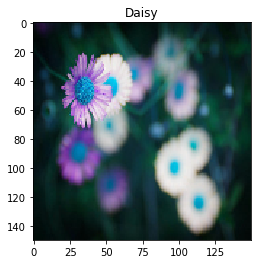

In [0]:
l=400

plt.imshow(flow[l])
plt.title(lab[l])

In [0]:
le=LabelEncoder()
Y=le.fit_transform(lab)



In [0]:
Y=to_categorical(Y,5)
X=np.array(flow)
X=X/255

In [0]:
X.shape


(3321, 150, 150, 3)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)


In [0]:
import time
dense_layers=[1,2]
layer_sizes=[32,96,64]
conv_layers=[2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
          NAME="{}--conv, {}--nodes, {}--dense {}".format(conv_layer,layer_size,dense_layer,int(time.time()))
          print(NAME)
          
          model=Sequential()
          
          model.add(Conv2D(layer_size, (3, 3), input_shape=(150,150,3)))
          model.add(Activation('relu'))
          model.add(MaxPooling2D(pool_size=(2, 2)))
          
          for l in range(conv_layer-1):
            model.add(Conv2D(layer_size, (3, 3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            
          model.add(Flatten())
          
          for _ in range(dense_layer):
            
            model.add(Dense(layer_size))
            model.add(Activation('relu'))
            
          model.add(Dense(5))
          model.add(Activation('softmax'))
         

          

          model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy']
                          )
         
          history=model.fit(x_train, y_train,
                      batch_size=32,
                      epochs=3,
                      validation_split=0.3)


2--conv, 32--nodes, 1--dense 1563913327
Train on 1743 samples, validate on 747 samples
Epoch 1/3
1743/1743 [==============================] - 6s 3ms/step - loss: 1.2397 - acc: 0.4613 - val_loss: 1.0183 - val_acc: 0.6225
Epoch 2/3
1743/1743 [==============================] - 3s 2ms/step - loss: 0.9742 - acc: 0.6047 - val_loss: 0.9419 - val_acc: 0.6265
Epoch 3/3
1743/1743 [==============================] - 3s 2ms/step - loss: 0.8203 - acc: 0.6804 - val_loss: 0.9627 - val_acc: 0.6212
3--conv, 32--nodes, 1--dense 1563913339
Train on 1743 samples, validate on 747 samples
Epoch 1/3
1743/1743 [==============================] - 6s 3ms/step - loss: 1.2383 - acc: 0.4630 - val_loss: 1.0313 - val_acc: 0.5703
Epoch 2/3
1743/1743 [==============================] - 3s 2ms/step - loss: 1.0081 - acc: 0.5731 - val_loss: 0.9418 - val_acc: 0.6252
Epoch 3/3
1743/1743 [==============================] - 3s 2ms/step - loss: 0.9020 - acc: 0.6363 - val_loss: 0.9345 - val_acc: 0.6345
2--conv, 96--nodes, 1--dense

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_130 (Activation)  (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
activation_131 (Activation)  (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 34, 34, 64)        36928     
__________

In [0]:
model=Sequential()

model.add(Conv2D(32,  (3,3),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(5,5)))

model.add(Conv2D(96,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))

model.add(Conv2D(96,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))




In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(x = x_train, y = y_train, epochs = 40, batch_size =50,validation_data=(x_test,y_test))


Train on 2490 samples, validate on 831 samples
Epoch 1/40
2490/2490 [==============================] - 8s 3ms/step - loss: 1.2070 - acc: 0.4691 - val_loss: 0.9351 - val_acc: 0.6017
Epoch 2/40
2490/2490 [==============================] - 3s 1ms/step - loss: 0.8969 - acc: 0.6237 - val_loss: 0.7595 - val_acc: 0.7016
Epoch 3/40
2490/2490 [==============================] - 3s 1ms/step - loss: 0.8247 - acc: 0.6635 - val_loss: 0.7328 - val_acc: 0.7160
Epoch 4/40
2490/2490 [==============================] - 3s 1ms/step - loss: 0.7336 - acc: 0.7088 - val_loss: 0.6795 - val_acc: 0.7353
Epoch 5/40
2490/2490 [==============================] - 3s 1ms/step - loss: 0.6567 - acc: 0.7466 - val_loss: 0.7907 - val_acc: 0.6667
Epoch 6/40
2490/2490 [==============================] - 3s 1ms/step - loss: 0.6371 - acc: 0.7422 - val_loss: 0.6067 - val_acc: 0.7593
Epoch 7/40
2490/2490 [==============================] - 3s 1ms/step - loss: 0.5716 - acc: 0.7839 - val_loss: 0.6502 - val_acc: 0.7593
Epoch 8/40
2490

In [0]:
preds = model.evaluate(x=x_test,y=y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

831/831 [==============================] - 1s 813us/step

Loss = 1.3383948275758901
Test Accuracy = 0.7677496982969245


Prediction: Its a Tulip


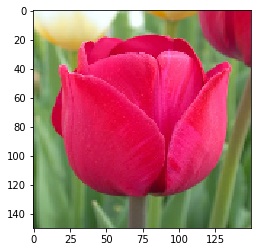

In [0]:
# categories=['Daisy','Dandelion','Rose','Sunflower','Tulip']
def prepare(filepath):
  
  img_size=150
  img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
  
  new_array=cv2.resize(img_array,(img_size,img_size))
  
  we=new_array.reshape(-1,img_size,img_size,3)
  
  
  return we

my_img='tulip.jpg'
prediction=model.predict([prepare(my_img)])

img = image.load_img(my_img, target_size=(150, 150))
plt.imshow(img)

# print(prediction)
if prediction[0][0]==1:
  print('Prediction: Its a Daisy')
elif prediction[0][1]==1:
  print('Prediction: Its a Dandelion')
elif prediction[0][2]==1:
  print('Prediction: Its a Rose')
elif prediction[0][3]==1:
  print('Prediction: Its a Sunflower')
elif prediction[0][4]==1:
  print('Prediction: Its a Tulip')
else:
  print('Unknown Flower')
  
